In [1]:
from speechsplitter.util import download_youtube_audio, dataset_from_segments

In [2]:
download_youtube_audio("https://www.youtube.com/watch?v=3HlPkRNNLh8", "sleep", destination="audio/")

[youtube] 3HlPkRNNLh8: Downloading webpage
[download] audio\FULL_INTERVIEWS\sleep.mp3 has already been downloaded
[download] 100% of 4.13MiB
[ffmpeg] Post-process file audio\FULL_INTERVIEWS\sleep.mp3 exists, skipping


'audio/sleep/'

In [2]:
dataset_from_segments('audio/sleep/', 'sleep')

'datasets/sleep.csv'

In [1]:
import pandas as pd

sound_data = pd.read_csv('datasets/sleep.csv')

In [2]:
from speechsplitter.predictor import scale_and_pca, optimal_K, gaussian_clustering

In [3]:
X = scale_and_pca(sound_data.drop(['filename', 'label'], axis=1))

In [4]:
k = optimal_K(X)

In [5]:
p = gaussian_clustering(3, X)

In [6]:
p

array([0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1],
      dtype=int64)

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2).fit(X)
pk = km.predict(X)

In [8]:
pk

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

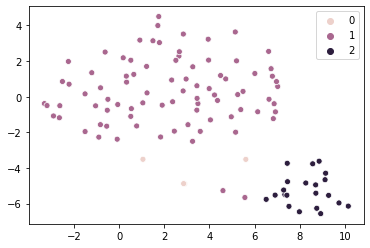

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

X_tsne = TSNE(n_components=2, random_state=420).fit_transform(X)

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=p)

In [8]:
import librosa
import IPython.display as ipd

for sample in sound_data[p == 0].filename[:]:
    
    print(sample)
    audio = f'audio/sleep/{sample}'
    ipd.display(ipd.Audio(audio))

sleep_0.wav


sleep_106.wav


sleep_107.wav


sleep_108.wav


In [10]:
from speechsplitter.predictor import pca_reconstruction_error

In [12]:
labels = pca_reconstruction_error(X, p)

replaced 0 instance(s) with 0
replaced 8 instance(s) with 1
replaced 2 instance(s) with 2


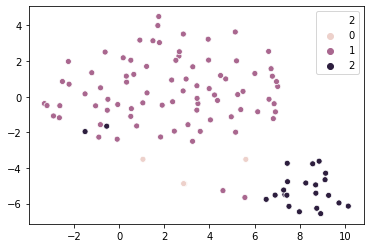

In [16]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels[2])

# WORLD test

In [10]:
import pyworld as pw

In [14]:
import librosa
x, sr = librosa.load(r'audio/sleep/sleep_5.wav', mono=True, duration=5)

In [24]:
f0, sp, ap = pw.wav2world(x.astype('double'), sr)

In [29]:
len(ap)

501

In [36]:
y = pw.synthesize(f0, sp, ap, sr)

In [57]:
import IPython.display as ipd

ipd.Audio(y, rate=sr)

In [96]:
y2 = pw.synthesize((f0 - 50), sp, ap, sr)

In [97]:
ipd.Audio(y2, rate=sr)

In [74]:
x_mom, sr_mom = librosa.load(r'audio/mom/mom0.wav', mono=True, duration=5)

In [98]:
ipd.Audio(x_mom, rate=sr_mom)

In [76]:
f0_m, sp_m, ap_m = pw.wav2world(x_mom.astype('double'), sr_mom)

In [177]:
y_mom = pw.synthesize((f0_m + 0), (sp_m + 0), (ap_m * 1), sr_mom * 1)

In [178]:
ipd.Audio(y_mom, rate=sr_mom)

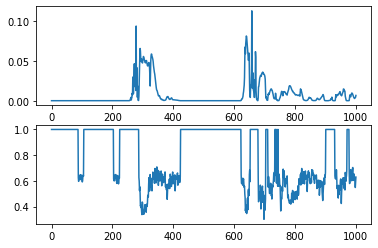

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

s = [x.mean() for x in sp_m]
a = [x.mean() for x in ap_m]

fig, ax = plt.subplots(2)
sns.lineplot(x=range(len(s)), y=s, ax=ax[0])
sns.lineplot(x=range(len(a)), y=a, ax=ax[1])

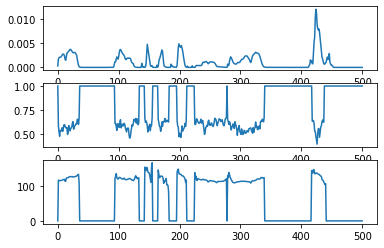

In [191]:
srr = [x.mean() for x in sp]
arr = [x.mean() for x in ap]

fig, ax = plt.subplots(3)
sns.lineplot(x=range(len(srr)), y=srr, ax=ax[0])
sns.lineplot(x=range(len(arr)), y=arr, ax=ax[1])
sns.lineplot(x=range(len(f0)), y=f0, ax=ax[2])